# Baixar dados do BCB (SGS e Expectativas)
Este notebook baixa séries do SGS (Selic, IPCA, hiato) e expectativas da pesquisa Focus.
Selecione o kernel `Python (brazil-taylor)` no Jupyter para usar a venv.

In [ ]:
## Agora é baixar e eentender as seguintes bases de dados:
# Selic – Meta                    / Código BCB: 4390   / Uso: i_t na regra de Taylor (taxa de juros-alvo)
# Selic – Efetiva                 / Código BCB: 4189   / Uso: alternativa para i_t (taxa efetiva anualizada)
# IPCA – Variação Mensal          / Código BCB: 433    / Uso: inflação (π_t), série mensal oficial (IBGE reproduzida pelo BCB)
# Expectativas IPCA 12 meses      / Fonte: Focus API   / Uso: inflação esperada (E_t π_{t+1}) nas regras forward-looking
# PIB Real (Contas Trimestrais)   / Fonte: IBGE 1620   / Uso: cálculo do hiato ou base para obtenção do hiato
# Hiato do Produto (BCB)          / Código BCB: 3904   / Uso: hiato do produto (ŷ_t) — série trimestral oficial do BCB
# Taxa de Juros Natural           / Código BCB: 13758  / Uso: r_t^n (opcional), para IS dinâmica ou robustez
# IBC-Br (Atividade Econômica)    / Código BCB: 24363  / Uso: proxy mensal de atividade econômica (alternativa ao PIB)
# Meta de Inflação (anual)        / Fonte: BCB         / Uso: comparação entre inflação e meta, robustez empírica
# Banda da Meta (anual)           / Fonte: BCB         / Uso: controle adicional em análises de regime


In [1]:
# Confirmar kernel e caminho do Python
import sys, platform
print('Kernel ativo:', sys.executable)
print('Versão Python:', platform.python_version())

Kernel ativo: /home/fernando/Insync/fernandovieira1@outlook.com/OneDrive/1. Educacao/2. Academia/3. DOUTORADO/USP - Economia Aplicada/MATERIAS/Macro II - Fernando e Gian/Part 2 - Gian/Artigo Macro 2/brazil-taylor-determinacy/.venv/bin/python
Versão Python: 3.12.3


In [2]:
# Imports principais
from bcb import sgs, Expectativas
import pandas as pd
from datetime import date

In [3]:
# Baixar Selic meta (código 432) e IPCA (código 433)
# Estratégia: baixar por anos individuais para evitar limite de 10 anos
from datetime import date
import pandas as pd
import time

def get_selic_por_anos(start_year=1999, end_year=None):
    """Baixa Selic ano a ano para evitar limite da API"""
    if end_year is None:
        end_year = date.today().year
    
    dfs = []
    for ano in range(start_year, end_year + 1):
        try:
            start = date(ano, 1, 1)
            end = date(ano, 12, 31)
            print(f"Baixando Selic {ano}...", end=" ")
            df = sgs.get(432, start=start, end=end)
            dfs.append(df)
            print(f"✓ {len(df)} obs")
            time.sleep(0.5)  # Pausa para não sobrecarregar a API
        except Exception as e:
            print(f"✗ Erro: {e}")
            continue
    
    selic_completa = pd.concat(dfs).sort_index()
    selic_completa = selic_completa[~selic_completa.index.duplicated(keep='last')]
    return selic_completa

print("Baixando Selic (1999-2025) ano a ano...")
selic = get_selic_por_anos(1999, 2025)

print("\nBaixando IPCA (série completa mensal)...")
ipca = sgs.get(433)

# Visualização
print(f"\n✓ Selic: {len(selic)} observações de {selic.index.min().date()} a {selic.index.max().date()}")
print(f"✓ IPCA: {len(ipca)} observações de {ipca.index.min().date()} a {ipca.index.max().date()}")

print("\n Últimas 5 observações da Selic:")
display(selic.tail())
print("\n📊 Últimas 5 observações do IPCA:")
display(ipca.tail())

Baixando Selic (1999-2025) ano a ano...
Baixando Selic 1999... ✓ 302 obs
✓ 302 obs
Baixando Selic 2000... Baixando Selic 2000... ✓ 366 obs
✓ 366 obs
Baixando Selic 2001... Baixando Selic 2001... ✓ 365 obs
✓ 365 obs
Baixando Selic 2002... Baixando Selic 2002... ✓ 365 obs
✓ 365 obs
Baixando Selic 2003... Baixando Selic 2003... ✓ 365 obs
✓ 365 obs
Baixando Selic 2004... Baixando Selic 2004... ✓ 366 obs
✓ 366 obs
Baixando Selic 2005... Baixando Selic 2005... ✓ 365 obs
✓ 365 obs
Baixando Selic 2006... Baixando Selic 2006... ✓ 365 obs
✓ 365 obs
Baixando Selic 2007... Baixando Selic 2007... ✓ 365 obs
✓ 365 obs
Baixando Selic 2008... Baixando Selic 2008... ✓ 366 obs
✓ 366 obs
Baixando Selic 2009... Baixando Selic 2009... ✓ 365 obs
✓ 365 obs
Baixando Selic 2010... Baixando Selic 2010... ✓ 365 obs
✓ 365 obs
Baixando Selic 2011... Baixando Selic 2011... ✓ 365 obs
✓ 365 obs
Baixando Selic 2012... Baixando Selic 2012... ✓ 366 obs
✓ 366 obs
Baixando Selic 2013... Baixando Selic 2013... ✓ 365 obs
✓ 3

,432
Date,
2025-12-06,15.0
2025-12-07,15.0
2025-12-08,15.0
2025-12-09,15.0
2025-12-10,15.0



📊 Últimas 5 observações do IPCA:


,433
Date,
2025-06-01,0.24
2025-07-01,0.26
2025-08-01,-0.11
2025-09-01,0.48
2025-10-01,0.09


In [9]:
ipca.head()

,433
Date,
1980-02-01,4.62
1980-03-01,6.04
1980-04-01,5.29
1980-05-01,5.70
1980-06-01,5.31


<Axes: title={'center': 'IPCA - Índice Nacional de Preços ao Consumidor Amplo'}, xlabel='Date'>

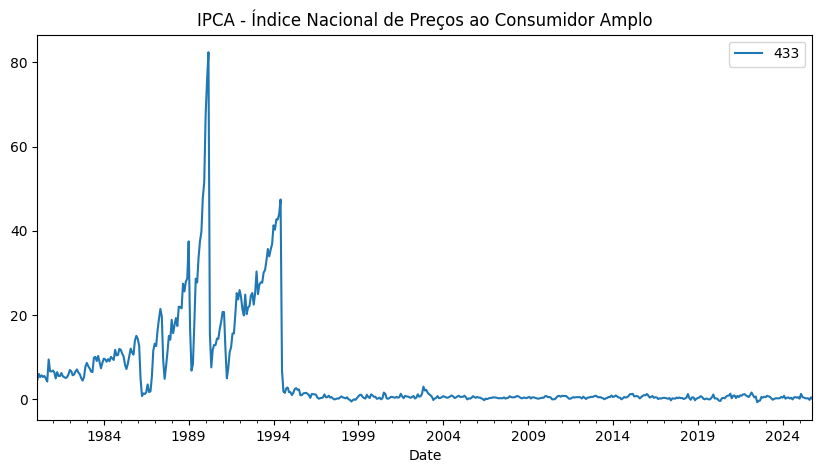

In [6]:
ipca.plot(title='IPCA - Índice Nacional de Preços ao Consumidor Amplo', figsize=(10, 5))

In [10]:
selic.head(50)

,432
Date,
1999-03-05,45.0
1999-03-06,45.0
1999-03-07,45.0
1999-03-08,45.0
1999-03-09,45.0
1999-03-10,45.0
1999-03-11,45.0
1999-03-12,45.0
1999-03-13,45.0


<Axes: title={'center': 'Taxa Selic Meta'}, xlabel='Date'>

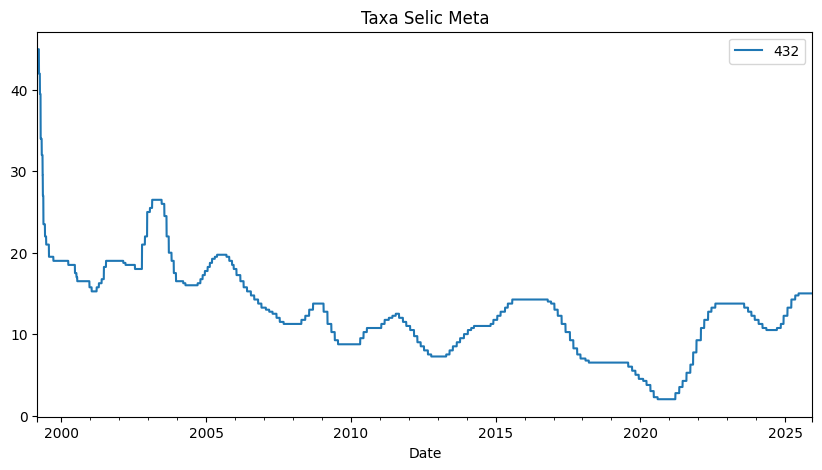

In [7]:
selic.plot(title='Taxa Selic Meta', figsize=(10, 5))